Import Library dan Load Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load Data
df= pd.read_csv("data_gempa.csv")
df

,No,Tanggal,Waktu,Lintang,Bujur,Keda,Mag,TypeMag,smaj,smin,az,rms,cPhase,Region
0,1.0,1/1/2018,00:43:05 UTC,11.65 LS,117.61 BT,10 Km,4.2 SR,MLv,7.912,2.807,233,0.581,14,"South of Sumbawa, Indonesia"
1,2.0,1/1/2018,00:52:32 UTC,0.33 LS,123.73 BT,112 Km,5.1 SR,MLv,10.316,0.932,54,0.904,39,"Minahassa Peninsula, Sulawesi"
2,3.0,1/1/2018,02:47:53 UTC,1.4 LS,120.47 BT,10 Km,2.4 SR,MLv,3.220,1.196,137,0.682,5,"Sulawesi, Indonesia"
3,4.0,1/1/2018,03:03:26 UTC,9.42 LS,117.9 BT,24 Km,2.4 SR,MLv,1.206,0.596,279,0.122,6,"Sumbawa Region, Indonesia"
4,5.0,1/1/2018,03:07:09 UTC,1.42 LU,122.04 BT,17 Km,1.9 SR,MLv,1.299,0.533,232,0.027,5,"Minahassa Peninsula, Sulawesi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,1289.0,8/3/2018,21:17:24 UTC,8.46 LS,116.53 BT,10 Km,2.2 SR,MLv,1.358,0.435,181,0.655,7,"Sumbawa Region, Indonesia"
6663,1289.0,8/3/2018,21:28:19 UTC,8.71 LS,116.36 BT,10 Km,2.5 SR,MLv,2.042,0.387,189,0.480,7,"Sumbawa Region, Indonesia"
6664,1289.0,8/3/2018,22:09:47 UTC,9.5 LS,120.77 BT,68 Km,4 SR,MLv,3.457,1.447,286,0.858,5,"Sumba Region, Indonesia"
6665,1289.0,8/3/2018,23:56:38 UTC,8.58 LS,116.49 BT,17 Km,2.9 SR,MLv,6.771,0.414,161,0.328,10,"Sumbawa Region, Indonesia"


Data Cleaning

In [28]:
df = df.drop(columns=['No','Tanggal','Waktu','TypeMag','smaj','smin','az','rms','cPhase','Region'])
df

,Lintang,Bujur,Keda,Mag
0,11.65 LS,117.61 BT,10 Km,4.2 SR
1,0.33 LS,123.73 BT,112 Km,5.1 SR
2,1.4 LS,120.47 BT,10 Km,2.4 SR
3,9.42 LS,117.9 BT,24 Km,2.4 SR
4,1.42 LU,122.04 BT,17 Km,1.9 SR
...,...,...,...,...
6662,8.46 LS,116.53 BT,10 Km,2.2 SR
6663,8.71 LS,116.36 BT,10 Km,2.5 SR
6664,9.5 LS,120.77 BT,68 Km,4 SR
6665,8.58 LS,116.49 BT,17 Km,2.9 SR


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Lintang  6667 non-null   object
 1   Bujur    6667 non-null   object
 2   Keda     6667 non-null   object
 3   Mag      6667 non-null   object
dtypes: object(4)
memory usage: 208.5+ KB


In [30]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the results
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)


Missing Values:
 Lintang    0
Bujur      0
Keda       0
Mag        0
dtype: int64

Duplicate Rows: 1855


In [31]:
df = df.drop_duplicates()

# Verify if duplicates were removed
duplicate_rows_after_cleaning = df.duplicated().sum()

# Display the cleaned data and the number of duplicates after cleaning
print("Duplicate Rows After Cleaning:", duplicate_rows_after_cleaning)
df

Duplicate Rows After Cleaning: 0


,Lintang,Bujur,Keda,Mag
0,11.65 LS,117.61 BT,10 Km,4.2 SR
1,0.33 LS,123.73 BT,112 Km,5.1 SR
2,1.4 LS,120.47 BT,10 Km,2.4 SR
3,9.42 LS,117.9 BT,24 Km,2.4 SR
4,1.42 LU,122.04 BT,17 Km,1.9 SR
...,...,...,...,...
6662,8.46 LS,116.53 BT,10 Km,2.2 SR
6663,8.71 LS,116.36 BT,10 Km,2.5 SR
6664,9.5 LS,120.77 BT,68 Km,4 SR
6665,8.58 LS,116.49 BT,17 Km,2.9 SR


In [32]:
# Fungsi untuk memproses Lintang
def process_Lintang(value):
    num, unit = value.split()
    num = float(num)
    if unit == "LS":
        return -num
    return num  # LU

# Fungsi untuk memproses Bujur
def process_Bujur(value):
    num, unit = value.split()
    num = float(num)
    if unit == "BB":
        return -num
    return num  # BT

def process_Keda(value):
    num, _ = value.split()  # Pisahkan angka dari unit (Km)
    return float(num)

# Fungsi untuk memproses Magnitudo
def process_Mag(value):
    num, _ = value.split()  # Pisahkan angka dari unit (SR)
    return float(num)

# Terapkan fungsi ke kolom
df["Keda"] = df["Keda"].apply(process_Keda)
df["Mag"] = df["Mag"].apply(process_Mag)

# Terapkan fungsi ke kolom
df["Lintang"] = df["Lintang"].apply(process_Lintang)
df["Bujur"] = df["Bujur"].apply(process_Bujur)

print(df)


      Lintang   Bujur   Keda  Mag
0      -11.65  117.61   10.0  4.2
1       -0.33  123.73  112.0  5.1
2       -1.40  120.47   10.0  2.4
3       -9.42  117.90   24.0  2.4
4        1.42  122.04   17.0  1.9
...       ...     ...    ...  ...
6662    -8.46  116.53   10.0  2.2
6663    -8.71  116.36   10.0  2.5
6664    -9.50  120.77   68.0  4.0
6665    -8.58  116.49   17.0  2.9
6666    -8.78  116.40   19.0  2.4

[4812 rows x 4 columns]


<ipython-input-32-b4d3c7c1cb03>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Keda"] = df["Keda"].apply(process_Keda)
<ipython-input-32-b4d3c7c1cb03>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mag"] = df["Mag"].apply(process_Mag)
<ipython-input-32-b4d3c7c1cb03>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Membuat Data Training

In [33]:
x_train = df[['Lintang','Bujur','Keda','Mag']].values

Featuring Scalling

In [34]:
# Setelah membersihkan data, lakukan standarisasi
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Mengubah hasil standarisasi menjadi DataFrame untuk mudah dilihat
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Menampilkan 5 baris pertama dari dataset yang sudah distandarisasi
print(df_scaled.head())

    Lintang     Bujur      Keda       Mag
0 -0.715792  0.145248 -0.515625  0.528868
1  0.205824  0.271095  0.588529  1.463315
2  0.118710  0.204059 -0.515625 -1.340025
3 -0.534237  0.151212 -0.364074 -1.340025
4  0.348300  0.236343 -0.439849 -1.859162


Mencari Nilai K terbaik

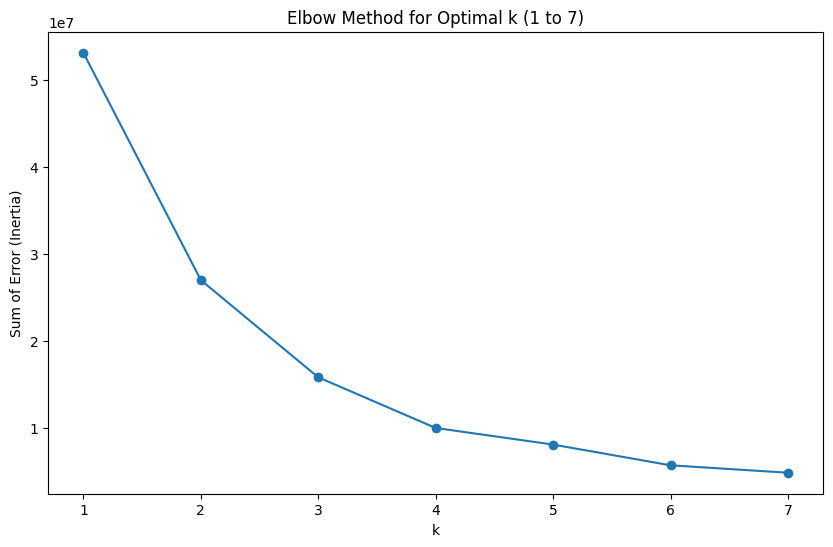

In [35]:
k_range = range(1, 8)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of Error (Inertia)')
plt.title('Elbow Method for Optimal k (1 to 7)')
plt.xticks(k_range)
plt.show()

In [36]:
inertias

[53174992.2421922,
 26988908.96007176,
 15793134.750038557,
 9959595.283896398,
 8047116.415671427,
 5659413.609988097,
 4804689.704659537]

Clustering menggunakana Algoritma K-Means

In [37]:
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [38]:
y_cluster = kmean.fit_predict(x_train)

y_cluster


array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [46]:
df['Cluster'] = y_cluster
df

<ipython-input-46-fe2f82ab4822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = y_cluster


,Lintang,Bujur,Keda,Mag,Cluster
0,-11.65,117.61,10.0,4.2,1
1,-0.33,123.73,112.0,5.1,2
2,-1.40,120.47,10.0,2.4,1
3,-9.42,117.90,24.0,2.4,1
4,1.42,122.04,17.0,1.9,1
...,...,...,...,...,...
6662,-8.46,116.53,10.0,2.2,1
6663,-8.71,116.36,10.0,2.5,1
6664,-9.50,120.77,68.0,4.0,1
6665,-8.58,116.49,17.0,2.9,1


In [40]:
## Mencari tau nilai centroid

kmean.cluster_centers_

array([[ -6.28036697,  14.96899083, 518.02752294,   4.77614679],
       [ -2.86555413, 111.83172767,  23.50396724,   3.60785769],
       [ -2.35281407, 117.32611809, 162.10175879,   3.94824121]])

Visualisasi Data Clustering

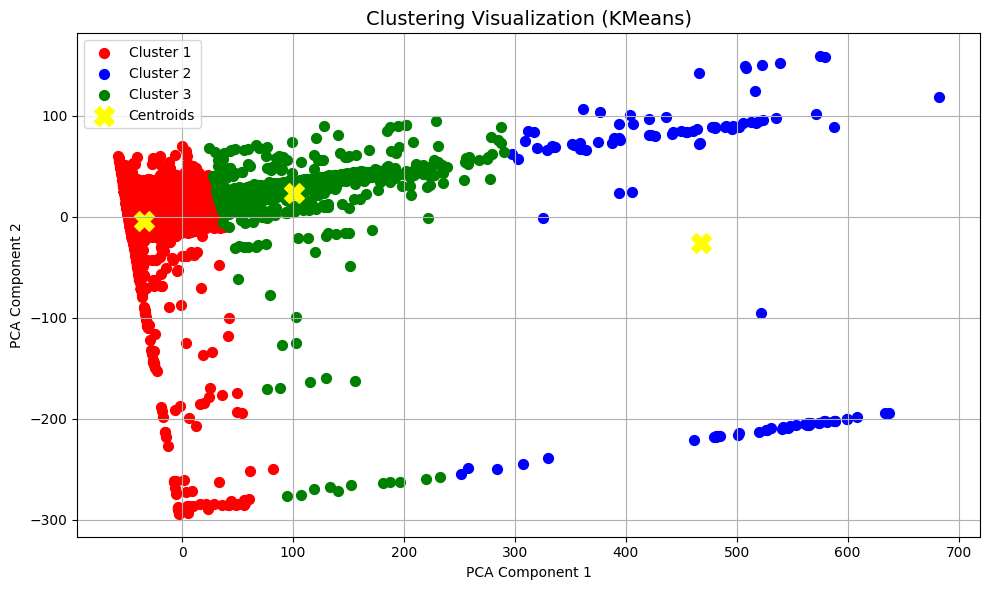

In [41]:
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_train)

predicted_labels = kmeans.labels_

colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(
        x_train_2d[predicted_labels == i, 0],
        x_train_2d[predicted_labels == i, 1],
        s=50,
        c=colors[i],
        label=f"Cluster {i+1}"
    )

centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='yellow', marker='X', label='Centroids')

plt.title("Clustering Visualization (KMeans)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [42]:
# Menampilkan jumlah data setelah PCA
print(f"Jumlah data PCA: {x_train_2d.shape[0]}")

# Menampilkan jumlah label KMeans
print(f"Jumlah label KMeans: {len(kmeans.labels_)}")


Jumlah data PCA: 4812
Jumlah label KMeans: 4812


In [43]:
df['Cluster'] = df['Cluster'].replace([0,1,2],['Kecil', 'Sedang', 'Besar'])
df

<ipython-input-43-760b98a81783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = df['Cluster'].replace([0,1,2],['Kecil', 'Sedang', 'Besar'])


,Lintang,Bujur,Keda,Mag,Cluster
0,-11.65,117.61,10.0,4.2,Sedang
1,-0.33,123.73,112.0,5.1,Besar
2,-1.40,120.47,10.0,2.4,Sedang
3,-9.42,117.90,24.0,2.4,Sedang
4,1.42,122.04,17.0,1.9,Sedang
...,...,...,...,...,...
6662,-8.46,116.53,10.0,2.2,Sedang
6663,-8.71,116.36,10.0,2.5,Sedang
6664,-9.50,120.77,68.0,4.0,Sedang
6665,-8.58,116.49,17.0,2.9,Sedang


In [44]:
# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_train)

# Prediksi cluster
predicted_labels = kmeans.labels_

# Evaluasi
silhouette_avg = silhouette_score(x_train, predicted_labels)
davies_bouldin = davies_bouldin_score(x_train, predicted_labels)
calinski_harabasz = calinski_harabasz_score(x_train, predicted_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Silhouette Score: 0.6659381848888283
Davies-Bouldin Index: 0.595481587571008
Calinski-Harabasz Index: 5691.391446607491
